In [36]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from collections import Counter
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-24 14:46:32,471: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
#task 1
def QP(i):
    circ1 = QuantumCircuit(1, 1)
    circ2 = QuantumCircuit(1, 1)
    
    if i == 0:
        circ1.h(0)
        circ1.measure(0, 0)
        return circ1
    elif i == 1:
        circ2.z(0)
        circ2.measure(0, 0)
        return circ2

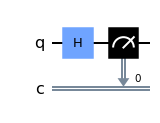

In [5]:
QP(0).draw('mpl')

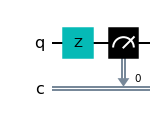

In [6]:
QP(1).draw('mpl')

In [7]:
#task 2
import random

def QP(p,trials):
    circ1 = QuantumCircuit(1, 1)
    circ2 = QuantumCircuit(1, 1)
    count1, count2 = 0, 0
    status = {}
    for i in range(trials):
        rand = random.uniform(0, 1)
        if rand < p:
            circ1.h(0)
            circ1.measure(0, 0)
            
            count1 += 1
            status['circ1'] = count1
        else:
            circ2.z(0)
            circ2.measure(0, 0)
            
            count2 += 1
            status['circ2'] = count2
            
    return status

In [8]:
qp = QP(0.5, 1000)
graph = plot_histogram(qp)
display(graph)

In [47]:
#task 3
def QP(n,n_qubits,q_prob,trials):
    backend = Aer.get_backend('qasm_simulator')
    q = QuantumRegister(n,'q')
    c = ClassicalRegister(n,'c')
    prob={}
    sum_prob = sum(q_prob)
    print('Sum of Probability:',sum_prob)
    if int(sum_prob)==1:
        for i in range(trials):
            qc = QuantumCircuit(q,c)
            circuit = np.random.choice(n_qubits,1,q_prob)
            if circuit =='x':
                qc.x(range(n))
            elif circuit  =='y':
                qc.y(range(n))
            elif circuit  =='z':
                qc.z(range(n))
            else:
                continue
            qc.measure(range(n),range(n))
            job = execute(qc,backend)
            counts = job.result().get_counts()
            prob = Counter(prob) + Counter(counts)
        return prob
    else:
        count = 0
        n_qubits.append('temp')
        x = 1- sum(q_prob)
        print('Probability of 1-sum:',x)
        q_prob.append(x)
        while (count<trials):
            qc = QuantumCircuit(q,c)
            circuit = np.random.choice(n_qubits,1,q_prob)
            if circuit == 'temp':
                continue
            elif circuit =='x':
                qc.x(range(n))
            else:
                continue 
            count +=1
            qc.measure(range(n),range(n))
            job = execute(qc,backend)
            counts = job.result().get_counts()
            prob = Counter(prob) + Counter(counts)
        return prob

Sum of Probability: 0.30000000000000004
Probability of 1-sum: 0.7


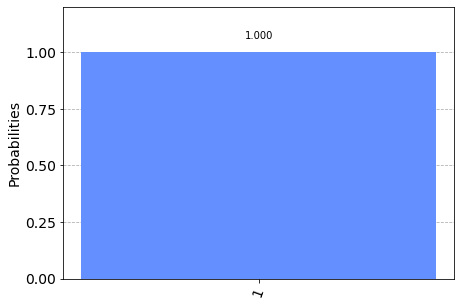

In [48]:
qp = QP(1,['x','y','z'],[0.1,0.1,0.1],100)
graph = plot_histogram(qp)
display(graph)